# Clustering MBCC 2023

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import gower
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.cluster import SilhouetteVisualizer
import pandas as pd

In [4]:
# load the data into a DataFrame
df = pd.read_csv('https://github.com/rodrimdz/MBCC2023/raw/main/MBCC.csv',encoding='ansi', sep=",")
df.shape

(786, 7)

In [123]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df["Family_style"]=df["Family_style"].str.strip()
df.head()

,Name,Style,Family_style,Brewery,Alc,IBU,Rating
0,1979 European Cup Final Replay,Sour - Fruited,Sour,Neon Raptor Brewing Co.,7.00,40.0,3.80
1,2 Live Gran Cru Greatest Hits Volume 7,Stout - Imperial / Double,Stout,Voodoo Brewing Co.,12.90,NaN,4.31
2,2022 Barrel-Aged Imperial Smells Like Bean Spirit,Stout - Imperial / Double,Stout,Mikerphone Brewing,14.24,NaN,4.34
3,2023 Barrel Aged Elder Beast,Stout - Imperial / Double,Stout,Branch & Bone Artisan Ales,14.00,NaN,4.22
4,2085-1 Bohemian Pilsner,Pilsner - Czech / Bohemian,Pilsner,2085 Brewery,5.50,45.0,3.56


#### How are the Ratings distributed?

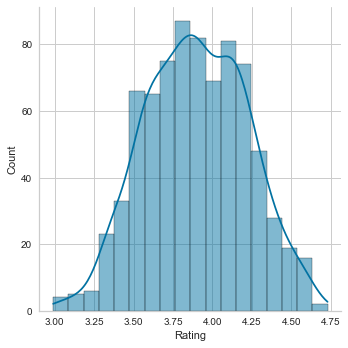

In [124]:
sns.displot(data=df, x=df["Rating"], kde=True)

#### Some plots with relationships between the data of the beers

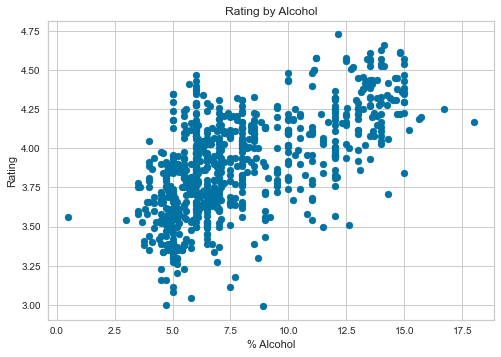

In [125]:
plt.scatter(df["Alc"], 
            df["Rating"])
plt.title("Rating by Alcohol")
plt.xlabel("% Alcohol")
plt.ylabel("Rating")
plt.show()

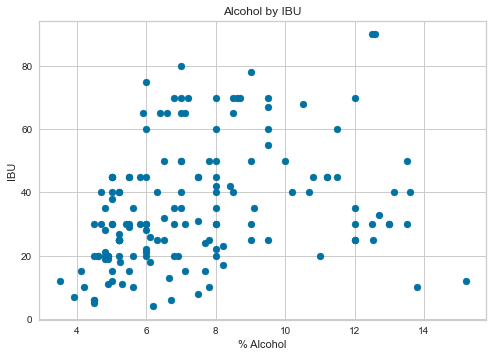

In [126]:
plt.scatter(df["Alc"], 
            df["IBU"])
plt.title("Alcohol by IBU")
plt.xlabel("% Alcohol")
plt.ylabel("IBU")
plt.show()

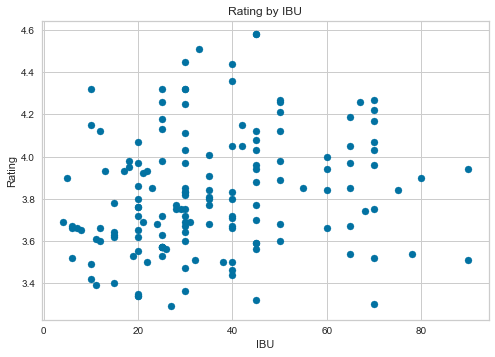

In [127]:
plt.scatter(df["IBU"], 
            df["Rating"])
plt.title("Rating by IBU")
plt.xlabel("IBU")
plt.ylabel("Rating")
plt.show()

#### Rankings of the best and worst beers of the festival 

In [128]:
df.sort_values('Rating',ascending=False).head(10)

,Name,Style,Family_style,Brewery,Alc,IBU,Rating
36,Assassin Vanilla Bean (2022),Stout - Imperial / Double,Stout,Toppling Goliath Brewing Co.,12.12,NaN,4.73
26,All Jus’d Up,Farmhouse Ale - Saison,Farmhouse,Carbon Brews,14.10,NaN,4.66
209,Double Barrel Bang This,Stout - Imperial / Double Pastry,Stout,CLAG Brewing Company,14.00,NaN,4.63
302,Heavenly Slumber,Stout - Imperial / Double,Stout,3 Sons Brewing Co.,14.80,NaN,4.62
773,Winkle Nectar,Stout - Imperial / Double Pastry,Stout,3 Sons Brewing Co.,14.80,NaN,4.61
90,Black Berry White,Mead - Other,Mead,Superstition Meadery,13.50,NaN,4.61
433,Mostra 6th Anniversary Stout,Stout - Imperial / Double,Stout,Toppling Goliath Brewing Co.,NaN,NaN,4.61
551,Pure Joy,Stout - Imperial / Double,Stout,Pulpit Rock Brewing Company,11.20,45.0,4.58
104,Bourbon BA Pistol Juice (2021),Mead - Melomel,Mead,Marlobobo,12.50,NaN,4.58
552,Pure Joy,Stout - Imperial / Double,Stout,Pulpit Rock Brewing Company,11.20,45.0,4.58


In [129]:
df.sort_values('Rating').head(10)

,Name,Style,Family_style,Brewery,Alc,IBU,Rating
102,Botanical Stout,Stout - Other,Stout,Buddelship Brauerei,8.9,NaN,2.99
349,Kölner Saft,Kölsch,Kolsch,Amager Bryghus,4.7,NaN,3.00
720,Toska Bryggj,Scottish Ale,Scottish,OY Brewing,5.8,NaN,3.04
456,Newtro,Hard Seltzer,Hard Seltzer,Untitled Art,5.0,NaN,3.08
13,45 Days Rice Lager,Lager - Japanese Rice,Lager,To Øl,5.0,NaN,3.11
473,Off the Beaten Track,Bock - Doppelbock,Bock,Buddelship Brauerei,7.5,NaN,3.11
524,Pilsner,Pilsner - Other,Pilsner,Flying Couch Brewing,4.5,NaN,3.16
330,Internal Eye Roll,Sour - Fruited,Sour,Recycled Brewing Company,4.7,NaN,3.16
327,Imperial Italian Pilsner,Pilsner - Italian,Pilsner,OY Brewing,7.7,NaN,3.18
721,Transcending Memories,Rauchbier,Rauchbier,WarPigs Brewpub,5.2,NaN,3.20


#### Rankings of the best and worst breweries of the festival 

In [130]:
df.groupby(['Brewery']).mean()['Rating'].sort_values(ascending=False).head(10)

Brewery
Marlobobo                       4.425000
Holy Goat Brewing               4.420000
Pulpit Rock Brewing Company     4.415714
Superstition Meadery            4.378571
Toppling Goliath Brewing Co.    4.328750
Spartacus Brewing               4.323750
3 Sons Brewing Co.              4.310000
Omnipollo                       4.267500
Moksa Brewing Co                4.258750
?rpus Brewing Co.               4.246250
Name: Rating, dtype: float64

In [131]:
df.groupby(['Brewery']).mean()['Rating'].sort_values().head(10)

Brewery
OY Brewing                      3.293750
Privatbrauerei Gaffel Becker    3.370000
Baeren Brauerei                 3.376250
2085-HS                         3.380000
RAWW Bier                       3.430000
Buddelship Brauerei             3.443750
Saules Cidery                   3.478750
Ebeltoft Gårdbryggeri           3.508750
Mahrs Bräu                      3.521429
Amager Bryghus                  3.530000
Name: Rating, dtype: float64

#### Number of beers by style 

In [132]:
df.Family_style.value_counts()

IPA              165
Stout            150
Sour             102
Wild Ale          51
Pilsner           48
Lager             38
Lambic            35
Farmhouse         27
Cider             24
Mead              23
Pale              20
Barleywine        19
Hard Seltzer      10
Belgian           10
Porter             8
Grape              7
Kolsch             5
Kellerbier         5
Fruit              4
Bock               4
Schwarzbier        4
Gluten-Free        3
Wheat Beer         2
Table              2
Rauchbier          2
Strong Ale         2
Bitter             2
Mild               2
Historical         1
Smoked             1
Blonde Ale         1
Brett              1
Rye                1
Red Ale            1
Golden Ale         1
Scottish           1
Non-Alcoholic      1
Grodziskie         1
Old Ale            1
Brown Ale          1
Name: Family_style, dtype: int64

In [133]:
#working with categorical variables
df=df.fillna(df.mean())
df = df.copy()
df[['NFamily_style']] = df[['Family_style']].apply(LabelEncoder().fit_transform)

#### Analyzing if there is a correlation between the data, we can see a slight correlation between the Alcohol and the Rating

In [134]:
df.corr()

,Alc,IBU,Rating,NFamily_style
Alc,1.000000,0.113780,0.614597,0.127694
IBU,0.113780,1.000000,0.078487,-0.051038
Rating,0.614597,0.078487,1.000000,0.170643
NFamily_style,0.127694,-0.051038,0.170643,1.000000


<AxesSubplot:>

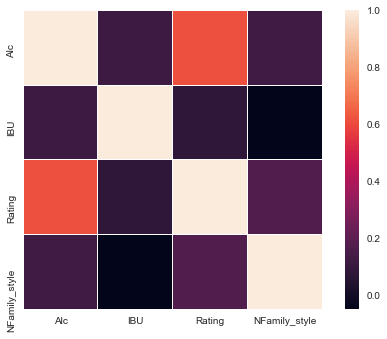

In [135]:
sns.heatmap(df.corr(),square=True,linewidths=.1)

#### Clustering starts:

In [136]:
#choosing columns to the clustering
relevant_cols = ["Alc", "Rating","NFamily_style"]
relevant_cols = df[relevant_cols]

In [137]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k,init='k-means++', n_init='auto', random_state=3425)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    
    return clusters_centers, k_values
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (8, 4))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [138]:
# Apply Gower distance calculation to NFamily_style column, since the numbers are not related each other 

gower_mat  = gower.gower_matrix(relevant_cols,  cat_features = [False, False, True])
scaler = StandardScaler()
scaler.fit(gower_mat)
scaled_data = scaler.transform(gower_mat)

#### Applying the elbow method, to see how many clusters are optimal 

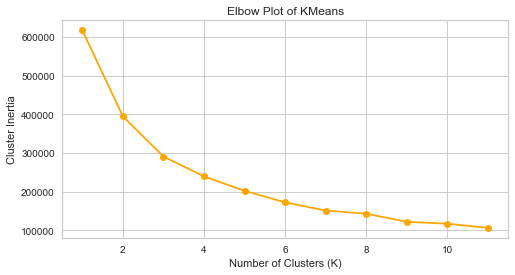

In [139]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)
generate_elbow_plot(clusters_centers, k_values)

#### The method of the silhouettes also allows to decide, choosing the classification of 5 clusters since it is the one with the clusters of similar sizes and almost all of them above the general average of the clustering.

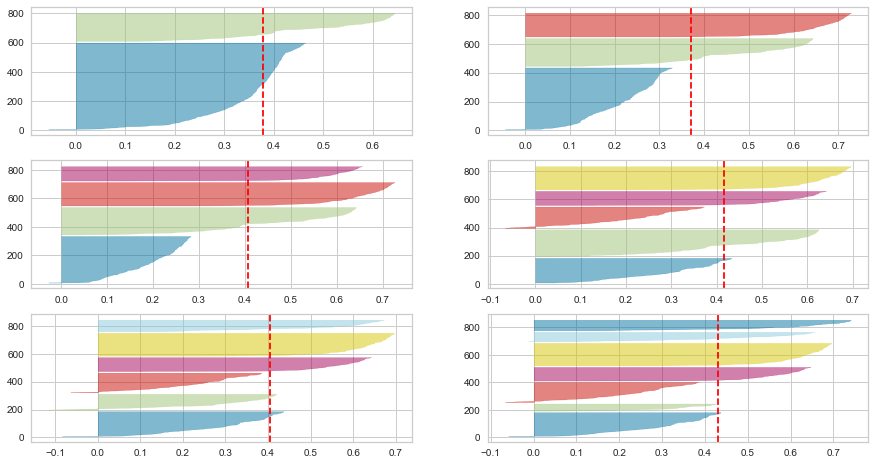

In [140]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
   
    km = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=3425)
    q, mod = divmod(i, 2)
 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data) 

In [141]:
#Adding the clusters column to the dataset
kmeans_model = KMeans(n_clusters = 5,init='k-means++', n_init='auto', random_state=3425)
kmeans_model.fit(scaled_data)
relevant_cols["clusters"] = kmeans_model.labels_
df["clusters"] = kmeans_model.labels_
df.head(10)

<ipython-input-141-30d5669476a6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Style,Family_style,Brewery,Alc,IBU,Rating,NFamily_style,clusters
0,1979 European Cup Final Replay,Sour - Fruited,Sour,Neon Raptor Brewing Co.,7.00,40.000000,3.80,34,3
1,2 Live Gran Cru Greatest Hits Volume 7,Stout - Imperial / Double,Stout,Voodoo Brewing Co.,12.90,35.547771,4.31,35,1
2,2022 Barrel-Aged Imperial Smells Like Bean Spirit,Stout - Imperial / Double,Stout,Mikerphone Brewing,14.24,35.547771,4.34,35,1
3,2023 Barrel Aged Elder Beast,Stout - Imperial / Double,Stout,Branch & Bone Artisan Ales,14.00,35.547771,4.22,35,1
4,2085-1 Bohemian Pilsner,Pilsner - Czech / Bohemian,Pilsner,2085 Brewery,5.50,45.000000,3.56,26,0
5,2085-16.3 SULTANA NEIPA,IPA - New England / Hazy,IPA,2085 Brewery,5.60,20.000000,3.86,16,4
6,2085-19 WEST COAST IPA,IPA - American,IPA,2085 Brewery,6.00,75.000000,3.84,16,4
7,2085-23 TROPICALE,IPA - New England / Hazy,IPA,2085 Brewery,6.00,20.000000,3.97,16,4
8,2085-24 COCONUT COCOA VANILLA STOUT,Stout - Oatmeal,Stout,2085 Brewery,5.50,15.000000,3.63,35,2
9,2085-3 Hoppy Mexican Lager,Lager - Mexican,Lager,2085 Brewery,5.30,11.000000,3.61,19,0


#### Plot of the different clusters, for example we can clearly see one for Sours (3), another for Pilsners, Lagers and other low rating beers (0), another for Stouts and other high Alcohol and Rating beers (1). 

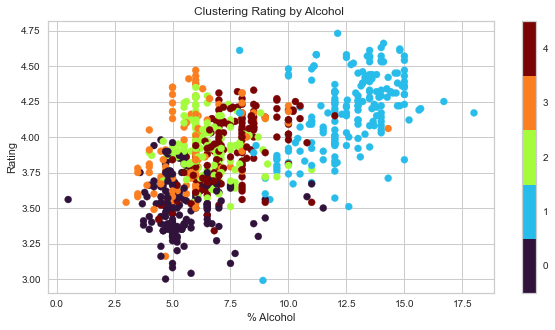

In [142]:
plt.figure(figsize=(10,5))
plt.scatter(df["Alc"], 
            df["Rating"],
           c = df["clusters"],label = df["clusters"].unique,
        cmap = plt.cm.get_cmap("turbo",5),vmin=-0.5,vmax=4.5)
plt.title("Clustering Rating by Alcohol ")
plt.colorbar()
plt.xlabel("% Alcohol")
plt.ylabel("Rating")
plt.show()

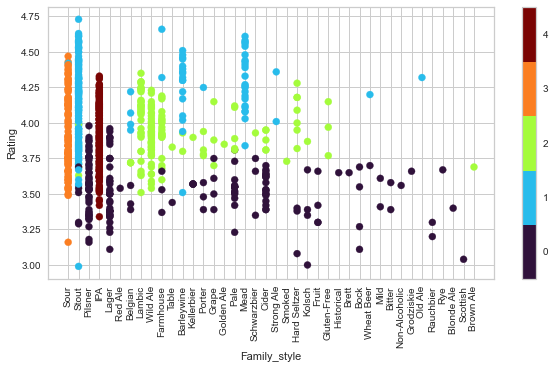

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(df["Family_style"], 
            df["Rating"],
           c = df["clusters"],label = df["clusters"].unique,
        cmap = plt.cm.get_cmap("turbo",5),vmin=-0.5,vmax=4.5)
plt.xlabel("Family_style")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.colorbar()
plt.show()

#### Finally, a 3D graph with the 3 dimensions Alcohol, Rating and Style, where we can move it to see how the 5 clusters were composed. 

In [147]:
#recommendation to run the script in Google Colab or Jupyter to be able to visualize the graph in 3D
fig = px.scatter_3d(relevant_cols, x="Alc", y="Rating", z="NFamily_style"
                    ,title="Beers by Alcohol, Rating and Style"
                    ,color = relevant_cols["clusters"].astype(str)
                    ,color_discrete_map = {'0': 'rgb(48,18,59)', '1': 'rgb(40,188,235)', '2': 'rgb(164,252,60)'
                                            , '3': 'rgb(251,126,33)', '4': 'rgb(122,4,3)'}
                   ,labels={"color": "Cluster", "NFamily_style": "Family_style","Alc": "% Alcohol"}
                   ,width=800, height=800)
fig.update_traces(marker=dict(line=dict(width=1,)))
fig.show()